# APPROXIMATE SOLUTION OF THE SCHROEDINGER EQUATION FOR A SQUARE WELL POTENTIAL #

## Load libraries

This is where you should include the appropriate code to load the relevant Python libraries

In [287]:
# math libraries
import math
import scipy as sp
import numpy as np
# visualization libraries
import matplotlib.pyplot as plt

## Define input variables 

This is where you would assign values to variables that can be adjusted by the user (e.g. particle mass, barrier width, barrier height, etc.) <br>
I suggest that you use use __descriptive variable names__ that are __not too onerous__ to type.

In [288]:
M_ = 1.672622e-27 # mass of proton in kg
V_ = 0.01 # tunneling barrier height in kcal/mol
L_ = 4.0  # box width in Angstroms
W_ = 1.0  # barrier width in Angstroms
N_ = 300   # number of basis functions
N_plot_ = 200 # number of grid points to use in plot

## Define functions

This is where you would define the functions that your code will use. Add as many code blocks as necessary, and __place each function into its own code block!__

In [289]:
def integrand(x,L,n,m):

    # simple function to calculate the product of two 1-D particle in a box functions
    
    return (2.0 / L) * np.sin(n*np.pi*x/L) * np.sin(m*np.pi*x/L)

In [290]:
def V_ij(i,j,L,V,x_min,x_max):

    # function to evaluate the matrix element V[i,j] = V * int { psi_n * psi_m ; x_min < x < x_max }

    I = sp.integrate.quad(integrand,x_min,x_max,args=(L,i+1,j+1),limit=100)

    return V * I[0]

In [291]:
def T_ij(i,j,m,L):

    # function to return the value fo the kinetic energy matrix element 
    # K[i,j] = 0 if i != j
    # K[i,j] = j**2*pi**2*hbar**2/(2*m*L**2) 
    # NOTE: hbar = 1 in au

    I = 0.0
    
    if ( i == j ): I = float(j+1)**2 * np.pi**2 / ( 2.0 * m * L**2 )

    return I

In [292]:
def psi_value(N,L,c,x):

    '''
    psi_value(N,L,c,x) returns the value of the wave function at x
    N_ number of basis functions
    L width of the box
    c vector of length N_ with expansion coefficients
    value of x at which to evaluate the wave function
    '''
    # initialize value of wave function
    
    wf_x = 0.0

    # loop over basis functions
    
    for i in range(N_):

        # evaluate value of psi_m(x), multiply it by expansion coefficient c[m], and update the value of wave function at x

        wf_x += c[i] * np.sin( (i+1) * np.pi * x / L ) 


    return (2.0 / L ) * wf_x

        

## Initialize arrays and matrices 

This is where you would initialize any marrays and matrices that you will use in the code below.

In [293]:
H       = np.zeros( (N_ , N_), dtype = float )
x_plot  = np.zeros( N_plot_ , dtype = float )
wf_plot = np.zeros( ( 2, N_plot_ ) , dtype = float )  

## Convert parameter values to atomic units

If needed, this is where you would convert input values to atomic units.

In [294]:
M_au = M_ / 9.1093837e-31
V_au = V_ / 23.0609
L_au = L_ / 0.529177
W_au = W_ / 0.529177

## Update the Hamiltonian matrix by adding the kinetic energy contributions

This is where you would implement the relevant loops (and calling any relevant functions) to add the kinetic energy contributiuon to the Hamiltonian matrix 

In [295]:
# update the function we wrote above

# loop over row index

for n in range(N_):

    # loop over column index
    
    for m in range(N_):

        # update the Hamiltonian matrix element

        H[n,m] += T_ij(n,m,M_au,L_au)

## QUESTION ... Can you think of a better (more efficient way) to do this? 

## Update the Hamiltonian matrix by adding the potential energy contributions

This is where you would implement the relevant loops (and calling any relevant functions) to add the potential energy contributiuon to the Hamiltonian matrix

In [296]:
# put barrier in the middle of the box

x_min = ( L_au - W_au ) / 2.0
x_max = x_min + W_au

# now update matrix elements using the function we wrote above

# loop over row index

for n in range(N_):

    # loop over column index

    for m in range(N_):

        H[n,m] += V_ij(n,m,L_au,V_au,x_min,x_max)


## DIagonalize the Hamiltonian to calculate the approximate solutions to the Schroedinger equation

This is where you would call the reelvant linear algebra functions to diagonalzie the Hamiltonian. __NOTE: The solutions are likely to be in a random order, so you will need to sort them!__

In [297]:
# diagonalize the Hamiltonian
# energies are stored in eig_vals and expansion coefficients are stored in eig_Vecs

eig_vals, eig_vecs = sp.linalg.eig(H)

# eigenvalues may contain imaginary components (due to roundoff) ... take the real part of eigenvlaues

eig_vals = np.real(eig_vals)

# eigenvalues are not necessarily sorted ... figure out sorting order and store it in eig_sort

eig_sort = eig_vals.argsort()[::1]


## Print key results

This is where you would communicate the key results of the calculations. In the contenxt of this assignment, this entails

- printing the values for the relevant input variables (i.e. those variables that affect the results of the calculation)
- printing the energies for the ground state and first excited state
- plotting the wave function for the ground state and first excited state

In [298]:
# print input parameters
print("INPUT PARAMETERS")
print("Mass of particle (kg):        ",M_)
print("Width of box (A):             ",L_)
print("Width of barrier (A):         ",W_)
print("Height of barrier (kcal/mol): ",V_)
print()
# print sorted eigenvalues
print("APPROXIMATE ENERGIES")
print("Ground-state energy (au):     ",eig_vals[eig_sort[0]])
print("1st excited-state energy (au):",eig_vals[eig_sort[1]])

INPUT PARAMETERS
Mass of particle (kg):         1.672622e-27
Width of box (A):              4.0
Width of barrier (A):          1.0
Height of barrier (kcal/mol):  0.01

APPROXIMATE ENERGIES
Ground-state energy (au):      0.000177308388270737
1st excited-state energy (au): 0.0002181911736707976


In [299]:
# make plots

dx = L_au / ( N_plot_ - 1 )

for i in range(N_plot_):

    # calculate & store value of x
    
    x_plot[i]    = dx * float(i)
    
    # calculate & store value of ground state WF at this value of x
    
    wf_plot[0,i] = psi_value(N_,L_au,eig_vecs[:,eig_sort[0]],x_plot[i]) 

    # calculate & store value of ground state WF at this value of x
    
    wf_plot[1,i] = psi_value(N_,L_au,eig_vecs[:,eig_sort[1]],x_plot[i])  

Text(0.5, 0, '$x / au$')

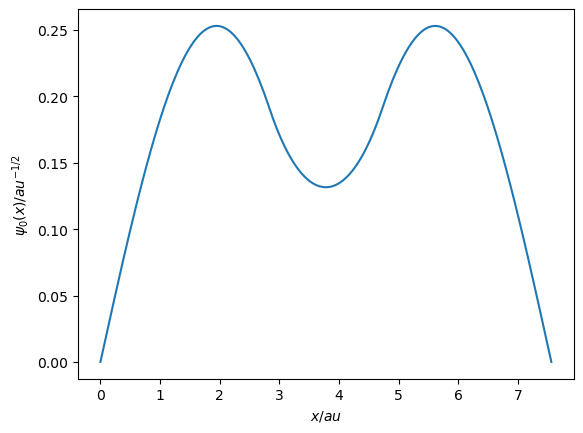

In [300]:
plt.plot( x_plot,wf_plot[0,:] )
plt.ylabel( '$\psi_0(x) / au^{-1/2}$' )
plt.xlabel( '$x / au$' )

Text(0.5, 0, '$x / au$')

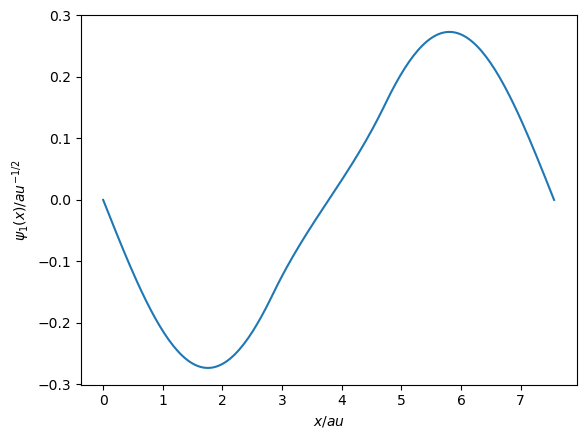

In [301]:
plt.plot( x_plot,wf_plot[1,:] )
plt.ylabel( '$\psi_1(x) / au^{-1/2}$' )
plt.xlabel( '$x / au$' )